<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84/prob_bayes_mle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
import math
import random

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import bernoulli, binom, multinomial, norm

# 베이즈 정리 시뮬레이션(유병률 문제)

- 다음 조건의 병 진단 문제를 파이썬 코드로 시뮬레이션

- 유병률: $p(D=1)=0.0001$

- 진단장비의 민감도: $p(P=1 \mid D=1)=0.99$

- 진단장비의 특이도: $p(P=0 \mid D=0)=0.99$

- 진단이 양성으로 나왔을 때 실제로 병에 걸려있을 확률을 전체 샘플 100만개에 대해서 시뮬레이션 하기

In [ ]:
# 1000000개 중에 100개가 1
N = 1000000
P = np.zeros(N)
# pos_idx = np.random.randint(N, size=100)
pos_idx = np.random.choice(N, size=100, replace=False)
P[pos_idx] = 1

In [ ]:
# P에 대해서 0.99확률로 양성, 음성 판단
DP = []
DN = []

TPR = 0.99
TNR = 0.99

for p in P:
    if p == 1:
        diagnosis = np.random.choice([0,1], p=[1-TPR, TPR])
    else:
        diagnosis = np.random.choice([0,1], p=[TNR, 1-TNR])

    if diagnosis:
        DP.append(p)
    else:
        DN.append(p)


In [ ]:
# 실제 병에 걸린 사람수 / 양성이라고 진단된 사람수
sum(DP) / len(DP)

0.009851726539954224

## 연습문제 풀이

In [ ]:
N = 1000000
P = np.zeros(N)
pos_idx = np.random.choice(N, size=10000, replace=False)
P[pos_idx] = 1

In [ ]:
#
DP = []
DN = []

TPR = 291 / (291+9)
TNR = 693 / (7+693)
print(TPR)
print(TNR)

for p in P:
    if p == 1:
        diagnosis = np.random.choice([0,1], p=[1-TPR, TPR])
    else:
        diagnosis = np.random.choice([0,1], p=[TNR, 1-TNR])

    if diagnosis:
        DP.append(p)
    else:
        DN.append(p)


0.97
0.99


In [ ]:
# 실제 병에 걸린 사람수 / 양성이라고 진단된 사람수
sum(DP) / len(DP)

0.4946001018848701

In [ ]:
((291/300)*(1/100)) / (((291/300) * (1/100))+((7/700)*(99/100)))

0.4948979591836735

# MLE

## 베르누이 분포의 MLE

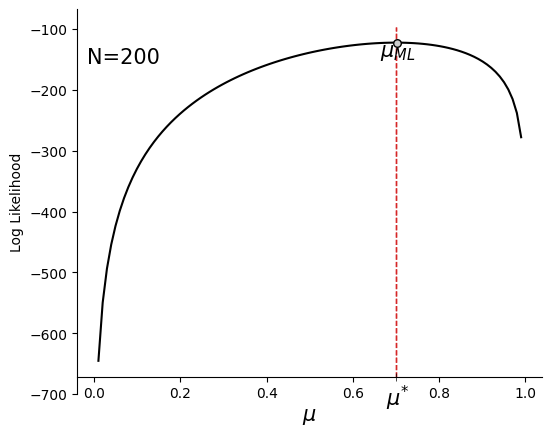

MLE mu: 0.7


In [ ]:
# 베르누이 변수 데이터 만들기[+]
mu_star = 0.7
size = 200 # 사이즈를 키워본다면?
D = np.random.choice([0,1], size=size, p=[1-mu_star, mu_star]).reshape(-1,1)
mu = np.linspace(0.01, 0.99, 100).reshape(1,-1)

# 로그 가능도 함수 계산[+]
# print(D)
# print(D.shape)
# print(mu.shape)
# print(np.dot(D, np.log(mu)).shape)
#    (N,1).(1,100):(N,100)   (N,1).(1,100):(N,100)       (N,100)->(100,)
L = ( np.dot(D, np.log(mu)) + np.dot((1-D),np.log(1-mu)) ).sum(axis=0)

# MLE mu 구하기
max_idx = np.argmax(L)
mu_hat = mu.reshape(-1)[max_idx]

fig = plt.figure(figsize=(6,5), dpi=100)
ax = plt.axes()

ax.plot(mu.reshape(-1), L, color='0.0', lw=1.5)
ax.scatter(mu_hat, L[max_idx], s=30, zorder=20, clip_on=False,
               edgecolor='k', facecolor="0.8", linewidth=1)
ax.text(mu_hat, L[max_idx], r"$\mu_{ML}$",
        va="top",
        size=15, ha="center")

y_min, y_max = ax.get_ylim()
# ax.axvline(mu_star, color="C3", linewidth=1, linestyle='--')
ax.vlines([mu_star, mu_star], ymin=y_min, ymax=y_max,
          color="C3", linewidth=1, linestyle='--')
ax.scatter(mu_star, y_min, s=30, zorder=20, clip_on=False,
        marker="|", facecolor="black", linewidth=0.5)
ax.text(0.69, 0.03, r"$\mu^{*}$",
        va="top", transform=ax.transAxes,
        size=15, ha="center")

ax.text(0.1, 0.9, f"N={size}",
        va="top", transform=ax.transAxes,
        size=15, ha="center")

ax.set_ylabel("Log Likelihood")
ax.set_xlabel(r'$\mu$', fontsize=15)

ax.spines["bottom"].set_position(("data", y_min))

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

print(f"MLE mu: {D.mean()}")

## 정규분포의 MLE

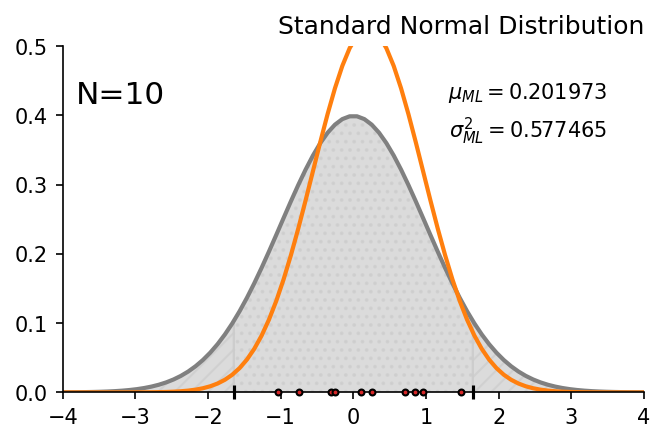

In [ ]:
fig = plt.figure(figsize=(5,3), dpi=150)
ax = plt.axes()

N = norm(loc=0, scale=np.sqrt(1))
size = 10
samples = N.rvs(size=size)

# MLE
mu_MLe = samples.mean()
var_MLe = np.power((samples-mu_MLe),2).mean()
N_MLe = norm(loc=mu_MLe, scale=np.sqrt(var_MLe))

x = np.linspace(-5, 5, 100)
p95interval = [N.ppf(0.05), N.ppf(0.95)]
p95interval_ = np.linspace(*p95interval, 100)
left_p95interval = np.linspace(-5, p95interval[0], 100)
right_p95interval = np.linspace(p95interval[1], 5, 100)

ax.set_xlim([-4, 4])
ax.set_ylim([0.0, 0.5])
ax.plot(x, N.pdf(x), color='0.5', lw=2)
ax.plot(x, N_MLe.pdf(x), color='C1', lw=2)
ax.fill_between(p95interval_, N.pdf(p95interval_), y2=0, color='0.8', alpha=0.7, hatch='...')
ax.fill_between(left_p95interval, N.pdf(left_p95interval), y2=0, color='0.8', alpha=0.7, hatch="///")
ax.fill_between(right_p95interval, N.pdf(right_p95interval), y2=0, color='0.8', alpha=0.7, hatch="///")
ax.set_title("Standard Normal Distribution", x=1, weight="light", ha="right")
ax.scatter(p95interval, np.zeros(len(p95interval)), s=50, zorder=20,
        clip_on=False, # 축바깥으로 나가도 자르지 않기
        marker="|", facecolor="black", linewidth=1.5)
ax.scatter(samples, np.zeros(len(samples)), s=8, zorder=20, clip_on=False,
            edgecolor='k', facecolor="C3", linewidth=1)
ax.text(0.1, 0.9, f"N={size}",
        va="top", transform=ax.transAxes,
        size=15, ha="center", usetex=False)

ax.text(0.8, 0.9, r"$\mu_{ML}="+'%.6f' % (mu_MLe)+"$",
        va="top", transform=ax.transAxes,
        size=10, ha="center", usetex=False)

ax.text(0.8, 0.8, r"$\sigma^2_{ML}="+'%.6f' % (var_MLe)+"$",
        va="top", transform=ax.transAxes,
        size=10, ha="center", usetex=False)

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()